---
# Examples of 3-D classifications using linear discriminant analysis with uniform spherical distributions 
---

The LDA method is applied to an "experimental" dataset made from two uniform spherical probability
distribution functions (PDF) weighted with their <i>a priori</i> class probabilities $P(C_{i})$:

<blockquote>  $P(\bf{x}) = P(\bf{x}|C_{1}) P(C_{1}) + P(\bf{x}|C_{2}) P(C_{2})$ </blockquote>


Discriminant methods are used to locate the influence zone of each data cluster <i>$\bf{i}$</i> over a 
spatial grid. This corresponds to regions where 

<blockquote> $P(\bf{x}|C_{i}) P(C_{i}) > P(\bf{x}|C_{j \ne i}) P(C_{j \ne i})$ </blockquote>

or 

<blockquote> $h_{i}(\bf{x}) > h_{j \ne i}(\bf{x})$ </blockquote>

with the discriminant function $h_{i}(\bf{x})$ defined as

<blockquote>  $h_{i}(\bf{x}) = \ln P(\bf{x}|C_{i}) P(C_{i})$ </blockquote>

 
## Linear <i>versus</i> Quadratic Discriminant Analysis 
The $h_{i}(\bf{x})$ functions differ whether the LDA or the QDA method is used. Their respective expressions are 
(up to additive constants):

LDA:  <blockquote>  $h_{i}(\bf{x}) = -\frac{1}{2}(\bf{x}-\bf{\mu_{i}})^\top \Sigma^{-1} (\bf{x}-\bf{\mu_{i}}) + \ln P(C_{i})$  </blockquote>

QDA:  <blockquote>  $h_{i}(\bf{x}) =\frac{1}{2}\ln |\Sigma_{i}| -\frac{1}{2}(\bf{x}-\bf{\mu_{i}})^\top \Sigma_{i}^{-1} (\bf{x}-\bf{\mu_{i}}) + \ln P(C_{i})$  </blockquote>

with 

<blockquote>  The observation:   $\bf{x}=[x_{1} x_{2}]^\top$ </blockquote> 

<blockquote>  The origin:   $\bf{\mu} = [\mu_{1} \mu_{2}]^\top$  </blockquote> 

The differences between LDA and QDA methods depend on the assumptions made about the covariance matrix $\Sigma$ 
of each class. The QDA method assumes different covariance matrices $\Sigma_{i} \neq \Sigma_{j}$ whereas the LDA method 
uses a shared covariance matrix that is a weighted mixture of the individual ones:

<blockquote>  $\Sigma = \sum_{i=0}^{N} P(C_{i}) \Sigma_{i}$ </blockquote>

Both expressions for the $h_{i}(\bf{x})$ functions are defined for gaussian distributions because analytical 
expressions are easier to derive in this scenario and also because gaussian distributions are often encountered in practice. 
Nevertheless, the two LDA and QDA equations can be used with other types of data distributions. This is why we apply the 
LDA method to a mixture of two uniform spherical distributions.

The LDA method separates data clusters with planar boundaries whereas the QDA uses more complex quadratic boundaries. We 
will show how the planar boundary between the two clusters moves in space when 
the <i>a priori</i> class probabilities $P(C_{i})$ are changed.



In [1]:
print(__doc__)

# Authors: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: XXX

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from skimage.measure import marching_cubes_lewiner

import math

import seaborn as sns; sns.set()


Automatically created module for IPython interactive environment


# Part I: Detailed example of two uniform spherical distributions with classification results
The spherical distributions may have different radii and number of data points.

In [2]:
# For replicability
np.random.seed(42)

# Center of each spherical data cluster
Mu = np.zeros((2,3))
Mu[0,:] = [5., 3., 3.]
Mu[1,:] = [5., 7., 7.]    

radius = np.array([2., 2.])

# A priori class probabilities
prob_C = np.array([0.5, 0.5]) 

x_min, x_max = 0., 10.
y_min, y_max = 0., 10.
z_min, z_max = 0., 10.

view = [30, -26]
npts = 5000

Function that generates a dataset with an uniform spherical distribution.

In [3]:
def make_spherical_distribution(r, mu, n):

    phi = np.random.uniform(0,2*math.pi, n)
    costheta = np.random.uniform(-1,1, n)
    u = np.random.uniform(0,1, n)

    theta = np.arccos( costheta )
    r =  r * np.cbrt( u )

    x =  mu[0] + r * np.sin( theta) * np.cos( phi )
    y =  mu[1] + r * np.sin( theta) * np.sin( phi )
    z =  mu[2] + r * np.cos( theta )

    X = np.c_[x.ravel(), y.ravel(), z.ravel()]

    return X    


Generate a dataset containing two uniform spherical distributions.

In [4]:
n = ( npts*prob_C).astype(int)

X0 = make_spherical_distribution(radius[0], Mu[0,:], n[0])
y0 = np.zeros(n[0])

X1 = make_spherical_distribution(radius[1], Mu[1,:], n[1])
y1 = np.ones(n[1])

X = np.r_[ X0, X1]
y = np.r_[ y0, y1]


Display the dataset

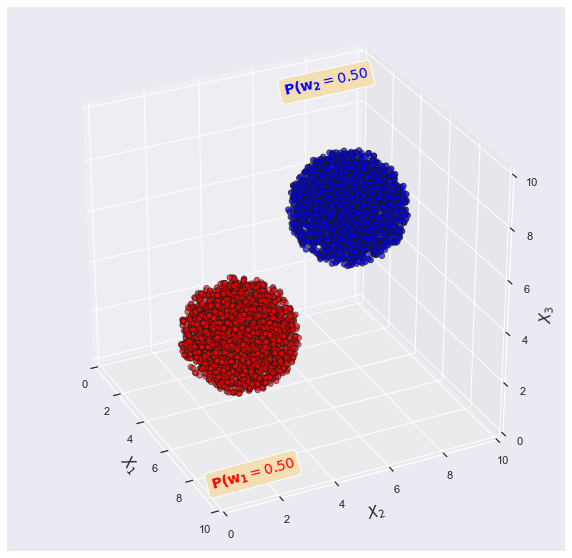

In [5]:
cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig = plt.figure(figsize = (10,10))
fig.canvas.set_window_title('3D')
ax = fig.gca(projection='3d')

ax.scatter( X[:, 0],  X[:, 1],  X[:, 2], s=30, c= y, cmap=cm_bright, edgecolors='k')
ax.view_init(view[0], view[1])
    
ax.set_xlim3d( x_min,  x_max)
ax.set_ylim3d( y_min,  y_max)
ax.set_zlim3d( z_min,  z_max)
ax.set_xlabel('$X_{1}$', fontsize=15)
ax.set_ylabel('$X_{2}$', fontsize=15)
ax.set_zlabel('$X_{3}$', fontsize=15)
ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5, -0.1)        

props = dict(boxstyle='round', facecolor='wheat', alpha=0.99)
texte1 = '$\mathbf{P(w_{1}} = %0.2f$' %  prob_C[0]   
texte2 = '$\mathbf{P(w_{2}} = %0.2f$' %  prob_C[1]   
ax.text(9.0, 0.0, 0., texte1, zdir='y', fontsize=14, bbox=props, color='red')             
ax.text(0.0, 7.0, 9., texte2, zdir='y', fontsize=14, bbox=props, color='blue')  

plt.show()


Generate a 3-D spatial grid where the PDF will be evaluated locally.

In [6]:
nx, ny, nz = 50, 50, 50
xx,  yy,  zz = np.meshgrid(np.linspace( x_min,  x_max,  nx), 
                           np.linspace( y_min,  y_max,  ny),
                           np.linspace( z_min,  z_max,  nz))
Xgrid = np.c_[ xx.ravel(),  yy.ravel(),  zz.ravel()]
    
# Grid spacings
dx = ( x_max -  x_min)/( nx-1)
dy = ( y_max -  y_min)/( ny-1)
dz = ( z_max -  z_min)/( nz-1)



Using Linear discriminant analysis, get the local probability for class 1

In [7]:
# Linear discriminant analysis (LDA)
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
prob = lda.fit( X,  y).predict_proba(Xgrid) 

# Get class 1 probability
prob = prob[:,1]
prob = prob.reshape(xx.shape)


Display the planar boundary between both spherical distributions

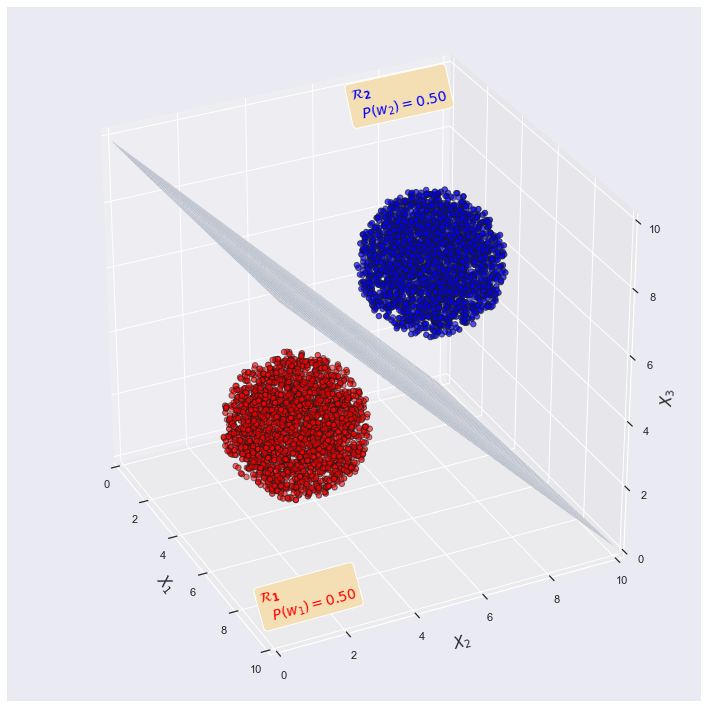

In [8]:
fig = plt.figure(figsize = (10,10))
fig.canvas.set_window_title('3D')
ax = fig.gca(projection='3d')

# Display the data points
ax.scatter( X[:, 0],  X[:, 1],  X[:, 2], s=30, c= y, cmap=cm_bright, edgecolors='k')


# Display the 3-D boundary separating the two data clusters. The boundary is located where the a posteriori 
# probabilities for both classes are identical, i.e. P(x|Ci)=0.5
prob = np.transpose( prob, (1, 0, 2))
verts, faces, _, _ = marching_cubes_lewiner( prob, 0.5, spacing=( dy,  dx,  dz))
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], alpha=0.5, edgecolor='w', linewidth=0.2, antialiased=True)

ax.view_init(view[0], view[1])
    
ax.set_xlim3d( x_min,  x_max)
ax.set_ylim3d( y_min,  y_max)
ax.set_zlim3d( z_min,  z_max)
ax.set_xlabel('$X_{1}$', rotation=0, fontsize=15)
ax.set_ylabel('$X_{2}$', fontsize=15)
ax.set_zlabel('$X_{3}$', fontsize=15)
ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5, -0.1)        


# Display class a priori probabilities
props = dict(boxstyle='round', facecolor='wheat', alpha=0.99)
texte1 = '$\mathbf{\mathcal{R}_{1}}$  \n  $P(w_{1}) = %0.2f$' %  prob_C[0]   
texte2 = '$\mathbf{\mathcal{R}_{2}}$  \n  $P(w_{2}) = %0.2f$' %  prob_C[1]   
ax.text(9.0, 0.0, 0., texte1, zdir='y', fontsize=14, bbox=props, color='red')               
ax.text(0.0, 7.0, 9., texte2, zdir='y', fontsize=14, bbox=props, color='blue')   


fig.tight_layout()

figName= "3D_LDA_classification_1.png"
plt.savefig(figName, format="png")

plt.show()


# Part II: Various examples of 3-D LDA segmentation of two uniform spherical distributions.
The following function contains most of the code in the previous cells; we use it to display the classification results for each example.

In [9]:
def generate_3D_LDA_segmentation(r, Mu, n, prob_C, x_min, x_max, y_min, y_max, z_min, z_max, figName, view=[15, -20]):

    # Number of data points in each cluster
    n = ( npts*prob_C).astype(int)

    # --------- Generate uniform spherical distributions-----
    for i in range(2):
        phi = np.random.uniform(0,2*math.pi, n[i])
        costheta = np.random.uniform(-1,1, n[i])
        u = np.random.uniform(0,1, n[i])

        theta = np.arccos( costheta )
        radius =  r[i] * np.cbrt( u )

        xi =  Mu[i,0] + radius * np.sin( theta) * np.cos( phi )
        yi =  Mu[i,1] + radius * np.sin( theta) * np.sin( phi )
        zi =  Mu[i,2] + radius * np.cos( theta )

        if (i==0):
            X = np.c_[xi.ravel(), yi.ravel(), zi.ravel()]
            y = np.zeros(n[0])
        else:   
            X = np.r_[X, np.c_[xi.ravel(), yi.ravel(), zi.ravel()]]
            y = np.r_[y, np.ones(n[i])]
            

    # --------- Generate a 3-D spatial grid where the PDF will be evaluated locally --------
    nx, ny, nz = 50, 50, 50
    xx,  yy,  zz = np.meshgrid(np.linspace( x_min,  x_max,  nx), 
                               np.linspace( y_min,  y_max,  ny),
                               np.linspace( z_min,  z_max,  nz))
    Xgrid = np.c_[ xx.ravel(),  yy.ravel(),  zz.ravel()]

    # Grid spacings
    dx = ( x_max -  x_min)/( nx-1)
    dy = ( y_max -  y_min)/( ny-1)
    dz = ( z_max -  z_min)/( nz-1)


    # ---------- Using Linear discriminant analysis (LDA), get the local probability for class 1 -----------
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    prob = lda.fit(X, y).predict_proba(Xgrid) 

    # Get class 1 probability
    prob = prob[:,1]
    prob = prob.reshape(xx.shape)


    # --------- Display the planar boundary between both spherical distributions -----
    fig = plt.figure(figsize = (10,10))
    fig.canvas.set_window_title('3D')
    ax = fig.gca(projection='3d')

    # Display the data points
    ax.scatter( X[:, 0],  X[:, 1],  X[:, 2], s=30, c= y, cmap=cm_bright, edgecolors='k')


    # Display the 3-D boundary separating the two data clusters. The boundary is located where the a posteriori 
    # probabilities for both classes are identical, i.e. P(x|Ci)=0.5
    prob = np.transpose( prob, (1, 0, 2))
    verts, faces, _, _ = marching_cubes_lewiner( prob, 0.5, spacing=( dy,  dx,  dz))
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], alpha=0.5, edgecolor='w', linewidth=0.2, antialiased=True)

    ax.view_init(view[0], view[1])

    ax.set_xlim3d( x_min,  x_max)
    ax.set_ylim3d( y_min,  y_max)
    ax.set_zlim3d( z_min,  z_max)
    ax.set_xlabel('$X_{1}$', rotation=0, fontsize=15)
    ax.set_ylabel('$X_{2}$', fontsize=15)
    ax.set_zlabel('$X_{3}$', fontsize=15)
    ax.yaxis.set_label_coords(-0.1,0.5)
    ax.xaxis.set_label_coords(0.5, -0.1)        

    # Display class a priori probabilities P(Ci)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.99)
    texte1 = '$\mathbf{\mathcal{R}_{1}}$  \n  $P(w_{1}) = %0.2f$' %  prob_C[0]   
    texte2 = '$\mathbf{\mathcal{R}_{2}}$  \n  $P(w_{2}) = %0.2f$' %  prob_C[1]   
    ax.text(9.0, 0.0, 0., texte1, zdir='y', fontsize=14, bbox=props, color='red')               
    ax.text(0.0, 7.0, 9., texte2, zdir='y', fontsize=14, bbox=props, color='blue')   


    fig.tight_layout()

    plt.savefig(figName, format="png")

    plt.show()


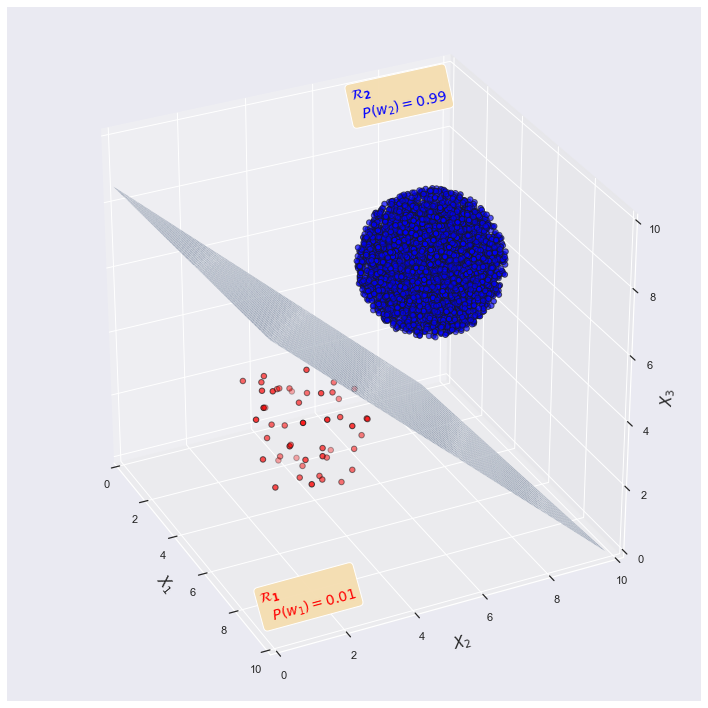

In [10]:
# For replicability
np.random.seed(42)

# Center of each spherical data cluster
Mu = np.zeros((2,3))
Mu[0,:] = [5., 3., 3.]
Mu[1,:] = [5., 7., 7.]    

radius = np.array([2., 2.])

# A priori class probabilities
prob_C = np.array([0.01, 0.99]) 

x_min, x_max = 0., 10.
y_min, y_max = 0., 10.
z_min, z_max = 0., 10.

view = [30, -26]
npts = 5000

figName= "3D_LDA_classification_2.png"

generate_3D_LDA_segmentation(radius, Mu, npts, prob_C, x_min, x_max, y_min, y_max, z_min, z_max, figName, view=[30, -26])


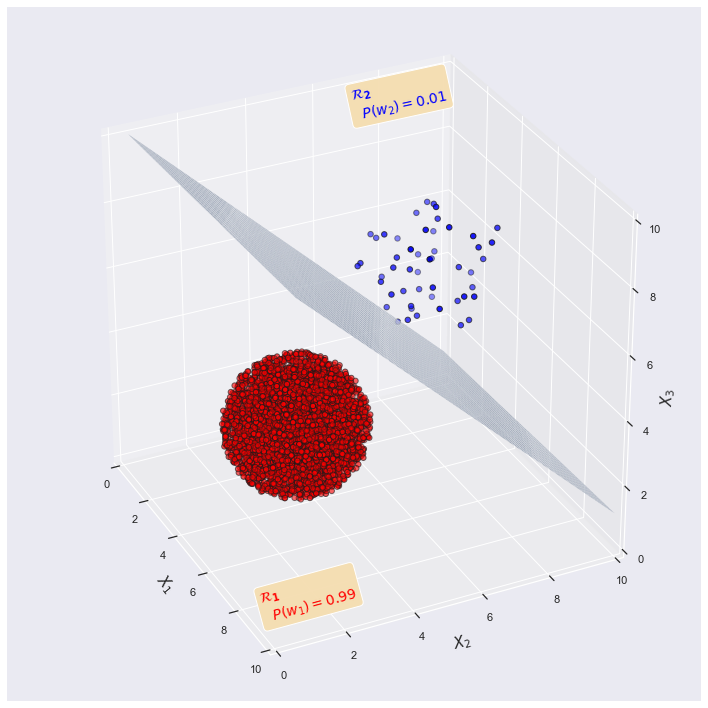

In [11]:
# For replicability
np.random.seed(42)

# Center of each spherical data cluster
Mu = np.zeros((2,3))
Mu[0,:] = [5., 3., 3.]
Mu[1,:] = [5., 7., 7.]    

radius = np.array([2., 2.])

# A priori class probabilities
prob_C = np.array([0.99, 0.01]) 

x_min, x_max = 0., 10.
y_min, y_max = 0., 10.
z_min, z_max = 0., 10.

view = [30, -26]
npts = 5000


figName= "3D_LDA_classification_3.png"

generate_3D_LDA_segmentation_with_influences_zones(radius, Mu, npts, prob_C, x_min, x_max, y_min, y_max, z_min, z_max, figName, view=[30, -26])
